In [230]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import dump_h5_data

In [231]:
colors = ["fe4a49","2ab7ca","fed766","00cc66","8c5383"]
colors = ["#"+color for color in colors]

uhf_noci_dict = {
    "label": "NOCI-UHF",
    "color": colors[0], 
    "linestyle": "--", 
    "marker": "o", 
    "markersize": 4,
    "markevery": 1
}

ump2_noci_dict_1 = {
    "label": "NOCI-UMP2-1",
    "color": colors[1],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 1
}

ump2_noci_dict_2 = {
    "label": "NOCI-UMP2-2",
    "color": colors[4],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 1
}

In [232]:
%%capture
dump_key_list  = ["ene-nuc", "ene-fci", "s2-fci"]
dump_key_list += ["ene-rhf", "ene-rmp2", "ene-rcisd"]
dump_key_list += [ "ene-uhf-bs",  "s2-uhf-bs"]
dump_key_list += ["ene-ump2-bs", "s2-ump2-bs"]
dump_key_list += ["ene-ucisd-bs", "s2-ucisd-bs"]
dump_key_list += ["ene-noci-uhf",     "s2-noci-uhf"]
dump_key_list += ["ene-noci-ump2-1",  "s2-noci-ump2-1"]
dump_key_list += ["ene-noci-ump2-2",  "s2-noci-ump2-2"]
dump_key_list += ["ene-noci-ucisd-1", "s2-noci-ucisd-1"]
dump_key_list += ["ene-noci-ucisd-2", "s2-noci-ucisd-2"]
data_dict = dump_h5_data("../data/h4-td-sto-3g.h5", dump_key_list=dump_key_list);


In [233]:
x         = data_dict["x"]
ene_rhf   = data_dict["ene-rhf"] + data_dict["ene-nuc"]
ene_rmp2  = data_dict["ene-rmp2"] + data_dict["ene-nuc"]
ene_rcisd = data_dict["ene-rcisd"] + data_dict["ene-nuc"]

get_line = lambda c, mask: numpy.array([c[i, m] for i, m in enumerate(mask)])

mask      = numpy.argmin(data_dict["ene-uhf-bs"], axis=1)
ene_uhf   = data_dict["ene-nuc"] + get_line(data_dict["ene-uhf-bs"], mask)
s2_uhf    = get_line(data_dict["s2-uhf-bs"], mask)

mask      = numpy.argmin(data_dict["ene-ump2-bs"], axis=1)
ene_ump2  = data_dict["ene-nuc"] + get_line(data_dict["ene-ump2-bs"], mask)
s2_ump2   = get_line(data_dict["s2-ump2-bs"], mask)

mask      = numpy.argmin(data_dict["ene-ucisd-bs"], axis=1)
ene_ucisd = data_dict["ene-nuc"] + get_line(data_dict["ene-ucisd-bs"], mask)
s2_ucisd  = get_line(data_dict["s2-ucisd-bs"], mask)

ene_fci   = data_dict["ene-fci"] + data_dict["ene-nuc"]

s2_fci   = data_dict["s2-fci"]
s2_rhf, s2_rmp2, s2_rcisd = s2_fci, s2_fci, s2_fci

ene_noci_uhf     = data_dict["ene-noci-uhf"] + data_dict["ene-nuc"]
ene_noci_ump2_1  = data_dict["ene-noci-ump2-1"] + data_dict["ene-nuc"]
ene_noci_ump2_2  = data_dict["ene-noci-ump2-2"] + data_dict["ene-nuc"]
ene_noci_ucisd_1 = data_dict["ene-noci-ucisd-1"] + data_dict["ene-nuc"]
ene_noci_ucisd_2 = data_dict["ene-noci-ucisd-2"] + data_dict["ene-nuc"]

s2_noci_uhf     = data_dict["s2-noci-uhf"]
s2_noci_ump2_1  = data_dict["s2-noci-ump2-1"]
s2_noci_ump2_2  = data_dict["s2-noci-ump2-2"]
s2_noci_ucisd_1 = data_dict["s2-noci-ucisd-1"]
s2_noci_ucisd_2 = data_dict["s2-noci-ucisd-2"]

In [234]:
colors = ["fe4a49","2ab7ca","fed766","00cc66","8c5383"]
colors = ["#"+color for color in colors]

uhf_noci_dict = {
    "label": "NOCI-UHF",
    "color": colors[0], 
    "linestyle": "--", 
    "marker": "o", 
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_1 = {
    "label": "NOCI-UMP2-1",
    "color": colors[1],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_2 = {
    "label": "NOCI-UMP2-2",
    "color": colors[3],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

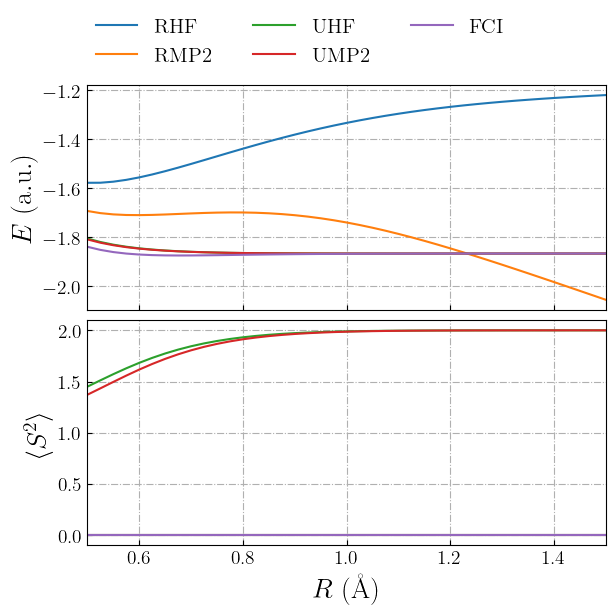

In [235]:
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6.5), sharex=True)

ax = axs[0]
ax.plot(x, ene_rhf,  label="RHF", )
ax.plot(x, ene_rmp2, label="RMP2",)
# ax.plot(x, ene_rcisd,label="RCISD",)

ax.plot(x, ene_uhf,  label="UHF", )
ax.plot(x, ene_ump2, label="UMP2",)
# ax.plot(x, ene_ucisd,label="UCISD",)
ax.plot(x, ene_fci,  label="FCI", )
# ax.plot(x, ene_noci_uhf, **uhf_noci_dict)
# ax.plot(x, ene_noci_ump2_1, **ump2_noci_dict_1)
ax.set_xlim(0.4, 1.0)
# ax.set_ylim(-1.9, -1.7)

ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.grid(True, linestyle='-.')

ax = axs[1]
ax.plot(x, s2_rhf,  label="RHF", )
ax.plot(x, s2_rhf, label="RMP2",)
# ax.plot(x, s2_rhf,label="RCISD",)
ax.plot(x, s2_uhf,  label="UHF", )
ax.plot(x, s2_ump2, label="UMP2",)
# ax.plot(x, s2_ucisd,label="UCISD",)
ax.plot(x, s2_fci,  label="FCI", )
# ax.plot(x, s2_noci_uhf, **uhf_noci_dict)
# ax.plot(x, s2_noci_ump2_1, **ump2_noci_dict_1)
ax.set_xlim(0.5, 1.5)

ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h4-td-1.png", dpi=600)

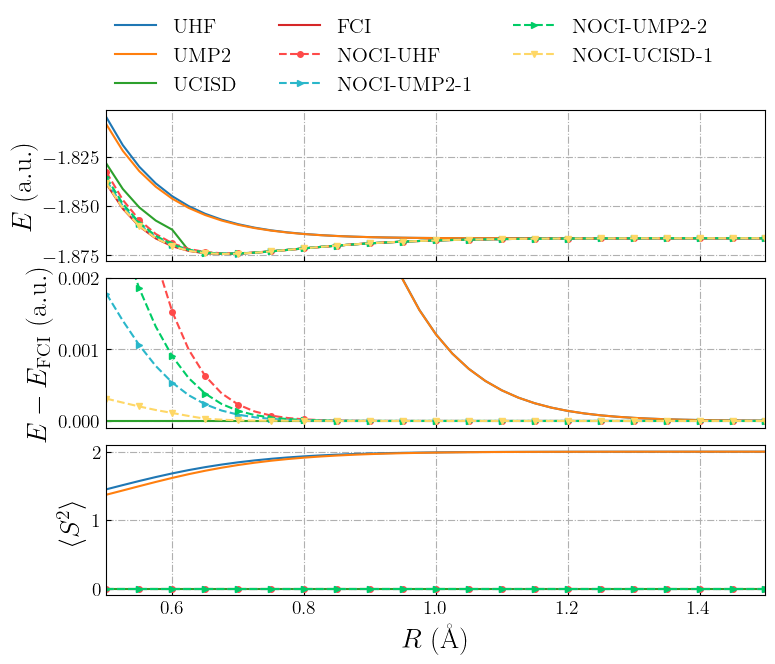

In [236]:
fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex=True)

ax = axs[0]
ax.plot(x, ene_uhf,  label="UHF", )
ax.plot(x, ene_ump2, label="UMP2",)
ax.plot(x, ene_ucisd,label="UCISD",)
ax.plot(x, ene_fci,  label="FCI", )

ax.plot(x, ene_noci_uhf, **uhf_noci_dict)
ax.plot(x, ene_noci_ump2_1, **ump2_noci_dict_1)
ax.plot(x, ene_noci_ump2_2, **ump2_noci_dict_2)
# ax.plot(x, ene_noci_ucisd_1, label="NOCI-UCISD-1", color=colors[2], linestyle="--", marker="v", markersize=4, markevery=2)
ax.set_xlim(0.4, 1.0)
# ax.set_ylim(-1.9, -1.7)

ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.grid(True, linestyle='-.')

ax = axs[1]
ax.plot(x, ene_uhf - ene_fci,  label="UHF", )
ax.plot(x, ene_ump2 - ene_fci, label="UMP2",)
# ax.plot(x, ene_ucisd,label="UCISD",)
ax.plot(x, ene_fci - ene_fci,  label="FCI", )

ax.plot(x, ene_noci_uhf - ene_fci, **uhf_noci_dict)
ax.plot(x, ene_noci_ump2_1 - ene_fci, **ump2_noci_dict_1)
ax.plot(x, ene_noci_ump2_2 - ene_fci, **ump2_noci_dict_2)
# ax.plot(x, ene_noci_ucisd_1 - ene_fci, label="NOCI-UCISD-1", color=colors[2], linestyle="--", marker="v", markersize=4, markevery=2)

ax.set_ylim(-1e-4, 2e-3)
ax.set_ylabel(r"$E - E_{\mathrm{FCI}}$ ($\mathrm{a.u.}$)")
ax.grid(True, linestyle='-.')

ax = axs[2]
ax.plot(x, s2_uhf,  label="UHF", )
ax.plot(x, s2_ump2, label="UMP2",)
# ax.plot(x, s2_ucisd,label="UCISD",)
ax.plot(x, s2_fci,  label="FCI", )

ax.plot(x, s2_noci_uhf, **uhf_noci_dict)
ax.plot(x, s2_noci_ump2_1, **ump2_noci_dict_1)
ax.plot(x, s2_noci_ump2_2, **ump2_noci_dict_2)
ax.set_xlim(0.5, 1.5)

ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h4-td-1.png", dpi=600)